# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import RobustScaler

# Data Ingestion

In [2]:
filepath = "../data/data.csv"

df = pd.read_csv(filepath)

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# Dataframe information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
# Statistical values for numerical colunns

df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Data Cleansing

## Drop Columns 

In [5]:
# Drop irrelevant columns

df.drop(columns=["ID"], inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Rename Columns

In [6]:
# Rename Target Column

df = df.rename(columns={"default.payment.next.month": "Default"})

In [7]:
# Convert column names to have only the first letter capitalized

df.columns = df.columns.str.capitalize()

df.head()

,Limit_bal,Sex,Education,Marriage,Age,Pay_0,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_amt4,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Exploratory Data Analysis 

## Distribution

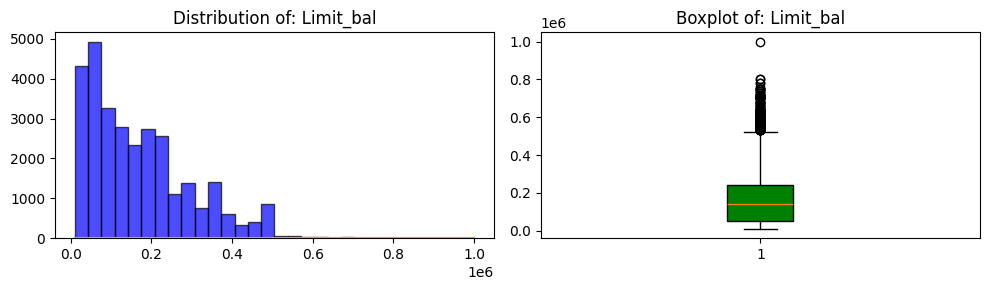

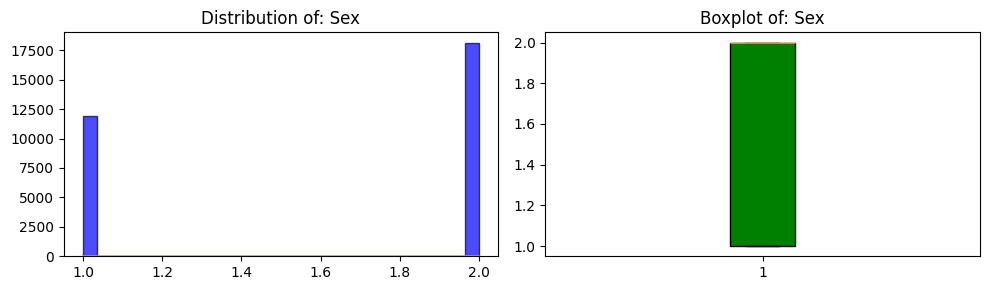

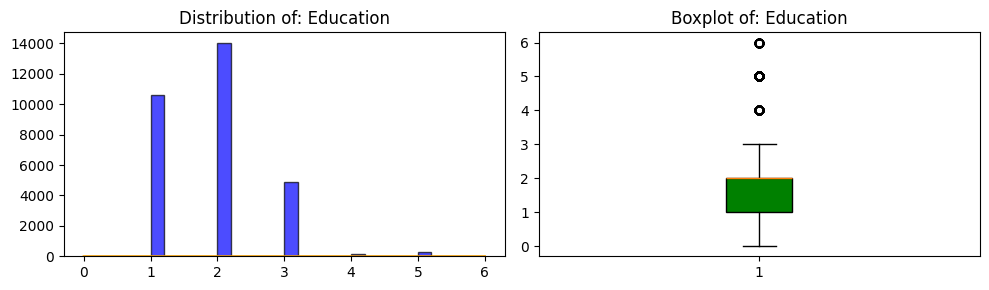

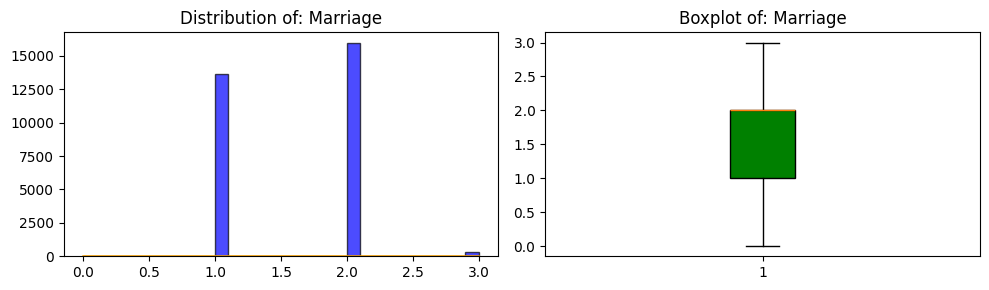

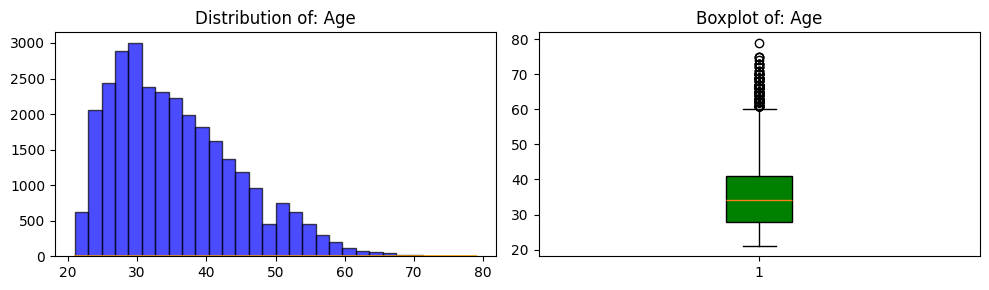

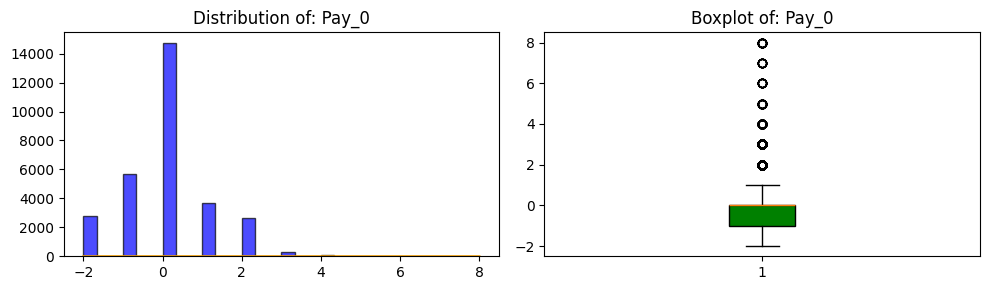

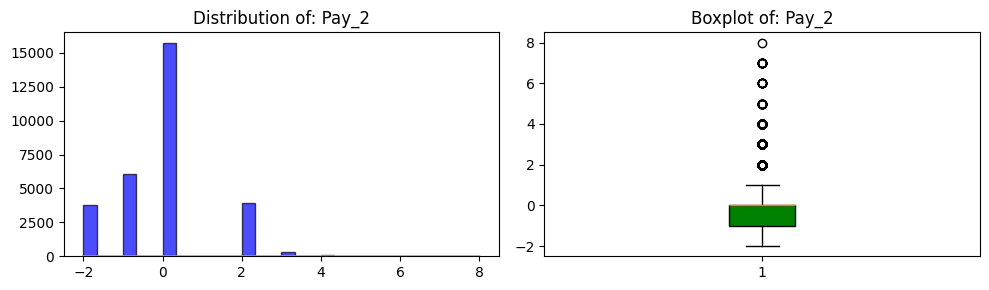

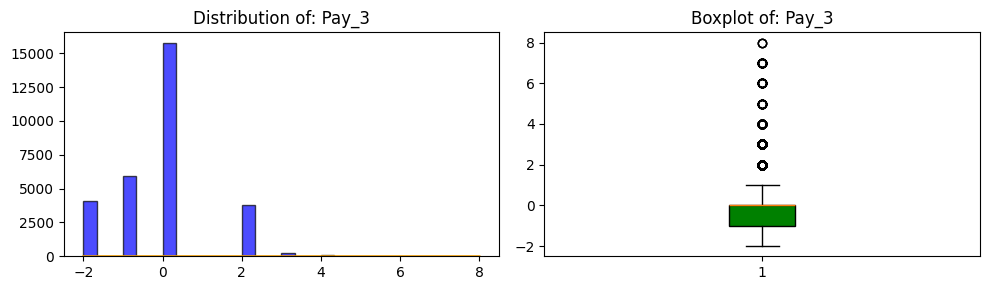

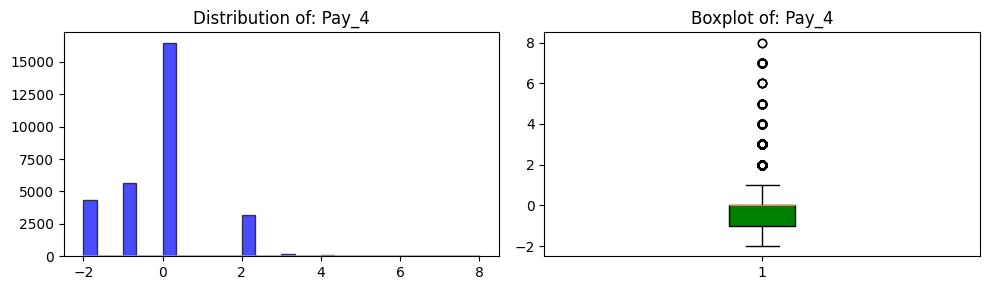

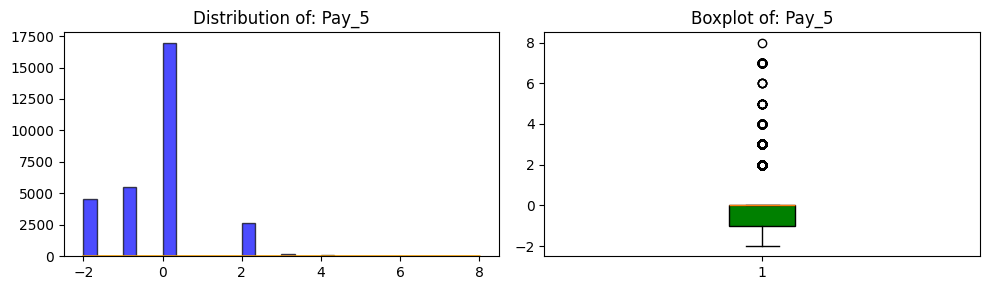

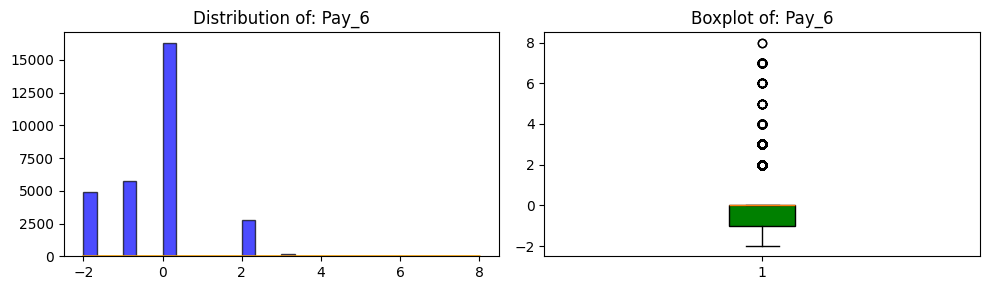

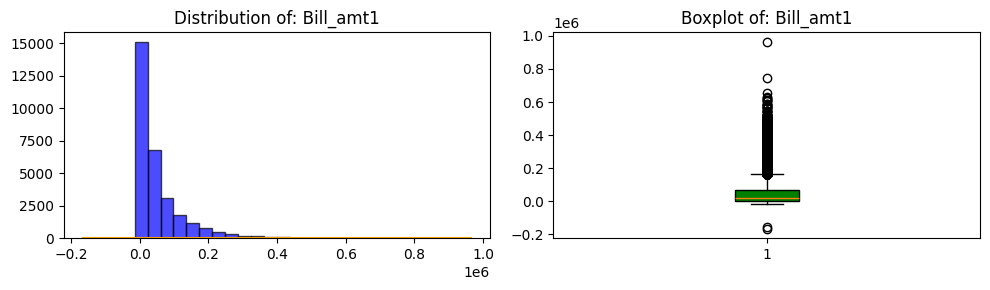

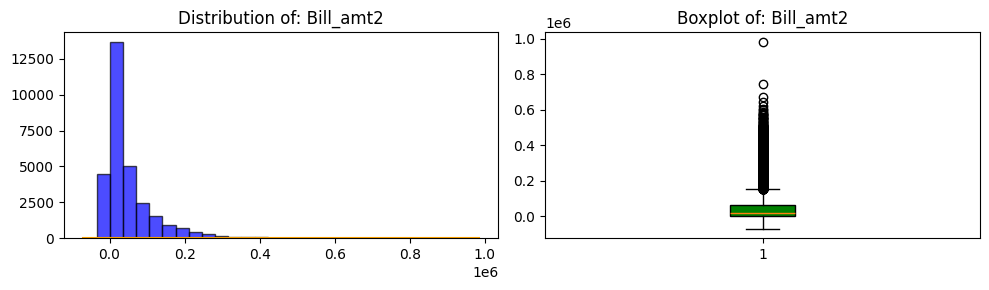

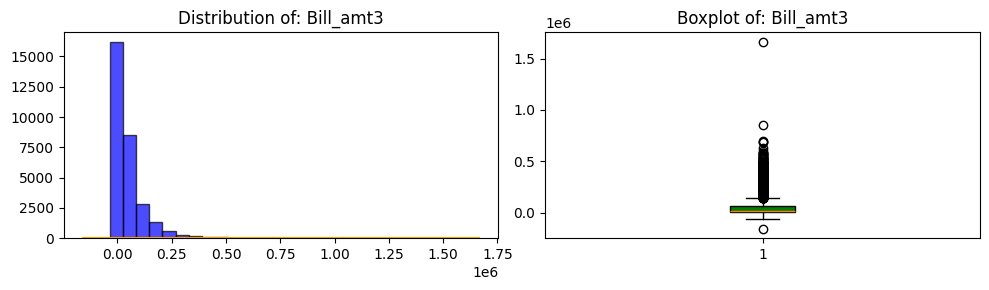

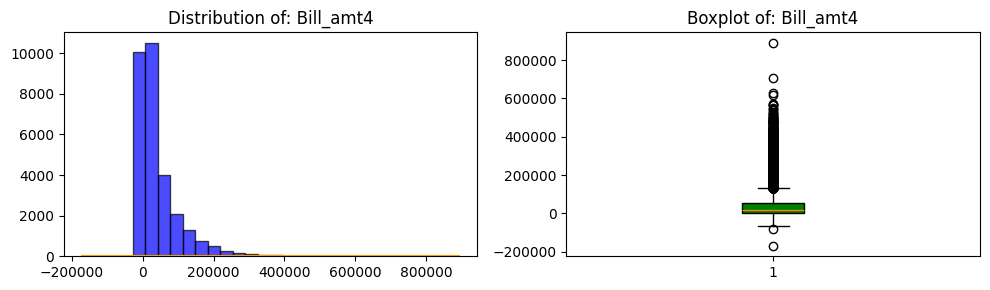

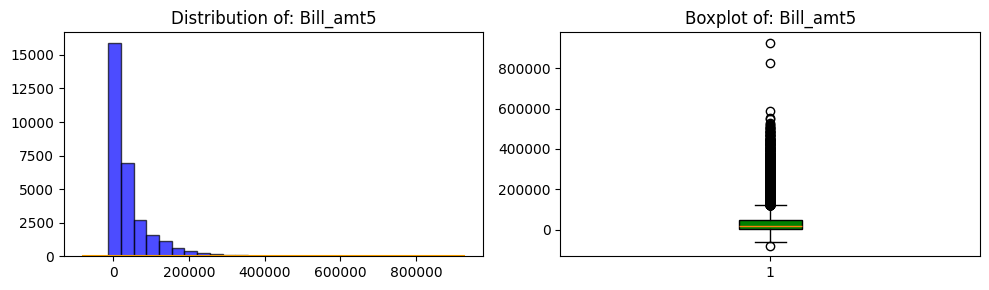

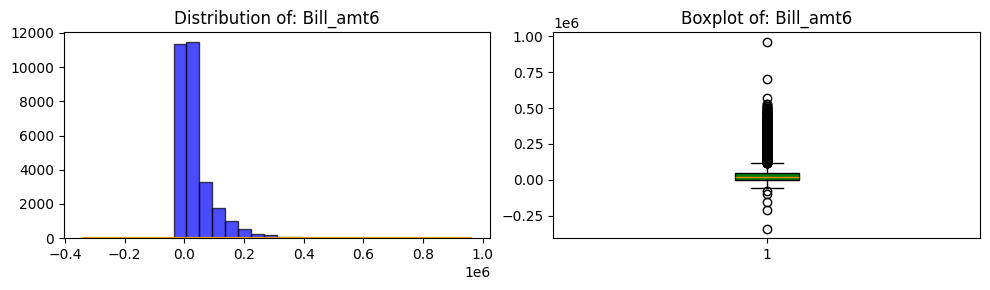

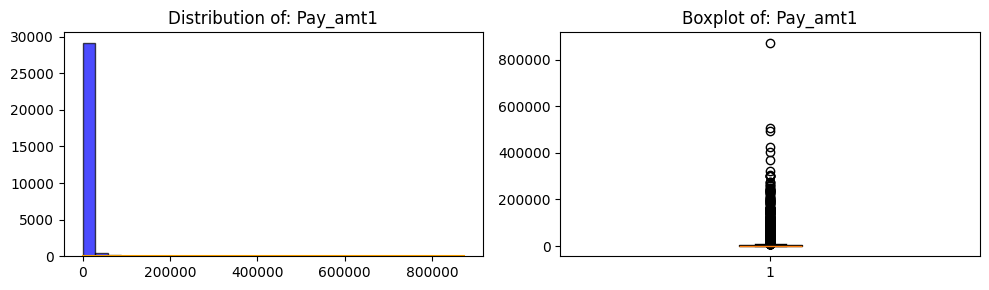

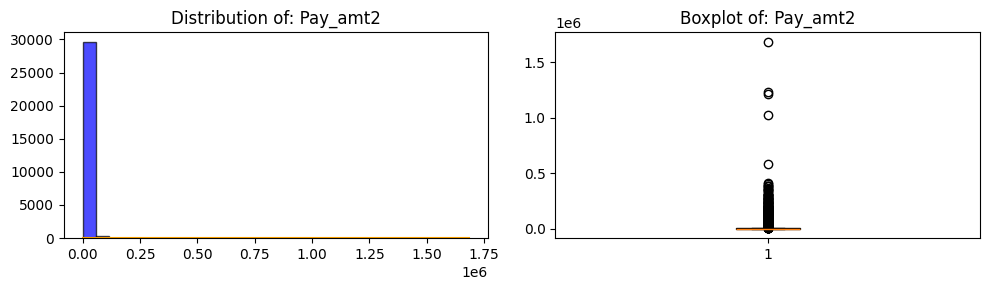

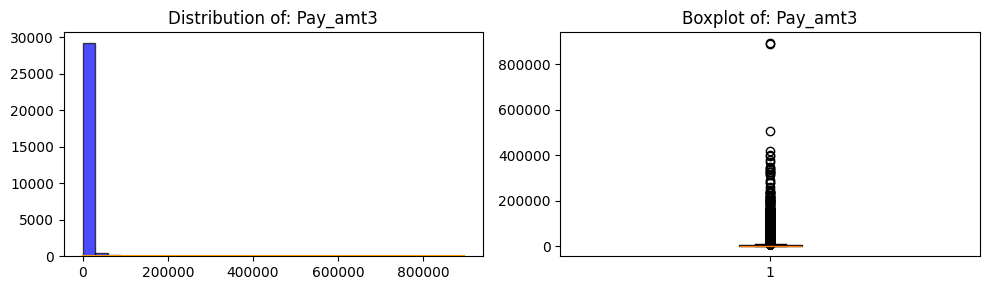

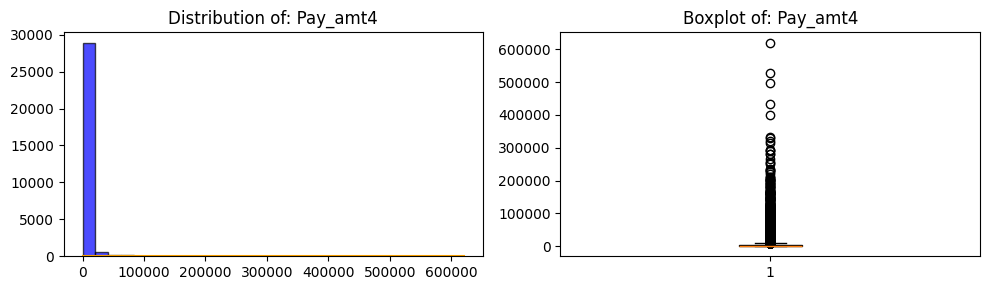

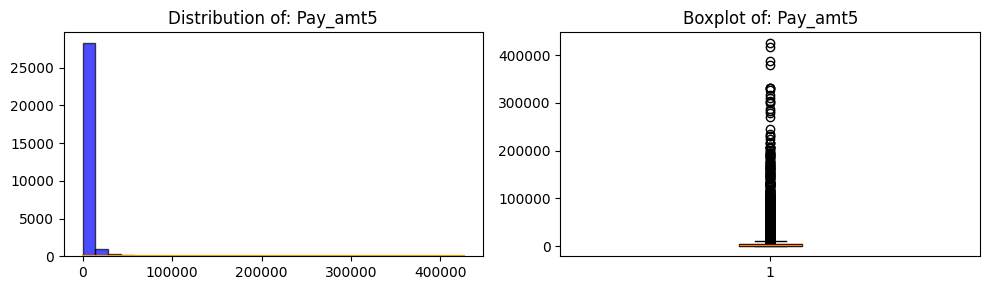

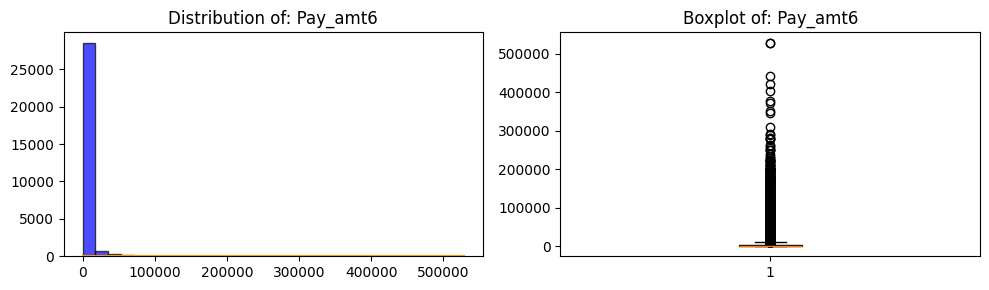

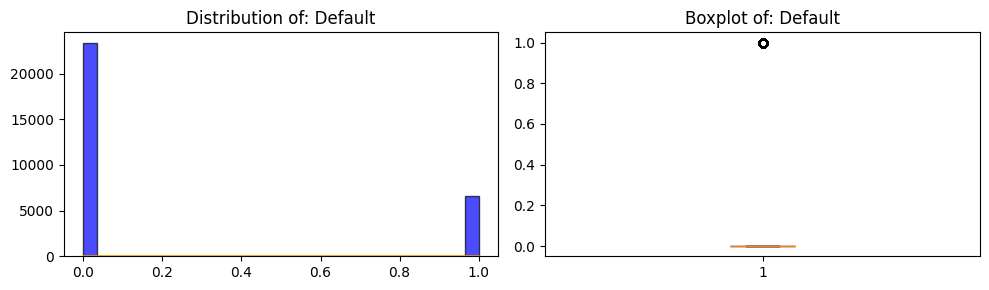

In [8]:
# Distribution

# Loop through each numerical feature
for numerical_feature in df.columns:
    # Creating two subplots per numerical_feature
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))

    # Histogram to get an overview of the distribution of each numerical_feature
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    ax[0].hist(df[numerical_feature], bins=30, color="blue", alpha=0.7, edgecolor="black")

    # Adding kernel density estimate (KDE)
    kde_x = np.linspace(df[numerical_feature].min(), df[numerical_feature].max(), 100)
    kde_y = np.exp(-0.5 * ((kde_x - df[numerical_feature].mean()) / df[numerical_feature].std()) ** 2) / (
        df[numerical_feature].std() * np.sqrt(2 * np.pi)
    )
    ax[0].plot(kde_x, kde_y, color="orange")

    # Boxplot to detect outliers
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    ax[1].boxplot(df[numerical_feature], patch_artist=True, boxprops=dict(facecolor="green", color="black"))

    plt.tight_layout()
    plt.show()

## Correct Unknown Values Education/Marriage/Pay

In [9]:
df.Education.value_counts()

Education
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [10]:
# Replace 0, 5, and 6 with 4 in the Education column (for simplification, they represent the same)

df["Education"] = df["Education"].replace({0: 4, 5: 4, 6: 4})

print(df["Education"].value_counts())

Education
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64


In [11]:
df.Marriage.value_counts()

Marriage
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [12]:
# Replace 0 with 3 in the Marriage column (for simplification, they represent the same)

df["Marriage"] = df["Marriage"].replace({0: 3})

# Display the updated value counts
print(df["Marriage"].value_counts())

Marriage
2    15964
1    13659
3      377
Name: count, dtype: int64


In [13]:
# Replace -1, -2, with 0 in the Pay columns (for simplification, they represent the same)

columns_to_replace = ["Pay_0", "Pay_2", "Pay_3", "Pay_4", "Pay_5", "Pay_6"]

df[columns_to_replace] = df[columns_to_replace].replace({-1: 0, -2: 0})

# Display the updated DataFrame
print(df["Pay_6"].value_counts())

Pay_6
0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: count, dtype: int64


## Check Balance

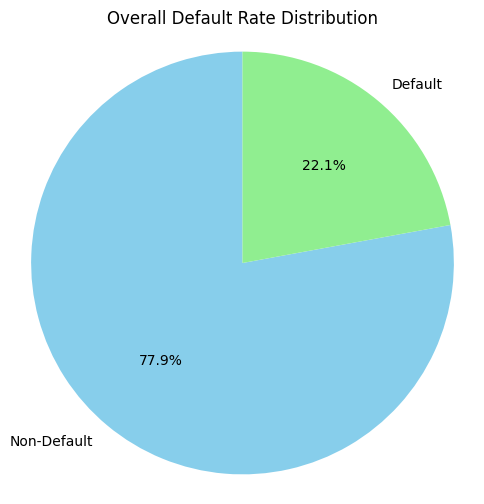

In [14]:
# Count the occurrences of each value in the 'Exited' column
exit_counts = df["Default"].value_counts()

# Custom labels for the pie chart
labels = ["Non-Default", "Default"]

# Plotting a pie chart for the 'Exited' column with custom labels
plt.figure(figsize=(6, 6))
plt.pie(exit_counts, labels=labels, autopct="%1.1f%%", startangle=90, colors=["skyblue", "lightgreen"])
plt.title("Overall Default Rate Distribution")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

# Preprocessing

In [15]:
df.columns

Index(['Limit_bal', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_0', 'Pay_2',
       'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'Pay_amt1',
       'Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6', 'Default'],
      dtype='object')

In [16]:
# Prepocessor

# Select Features
features_robust = [
    "Limit_bal",
    "Bill_amt1",
    "Bill_amt2",
    "Bill_amt3",
    "Bill_amt4",
    "Bill_amt5",
    "Bill_amt6",
    "Pay_amt1",
    "Pay_amt2",
    "Pay_amt3",
    "Pay_amt4",
    "Pay_amt5",
    "Pay_amt6",
]

# Define features and target
X = df.drop(columns=["Default"])
y = df["Default"]

# Column Transformer for scaling
preprocessor = ColumnTransformer(
    transformers=[
        ("robust_scaler", RobustScaler(), features_robust)  # Apply RobustScaler to the selected features
    ],
    remainder="passthrough",  # Keep other columns unchanged
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('robust_scaler', RobustScaler(),
                                 ['Limit_bal', 'Bill_amt1', 'Bill_amt2',
                                  'Bill_amt3', 'Bill_amt4', 'Bill_amt5',
                                  'Bill_amt6', 'Pay_amt1', 'Pay_amt2',
                                  'Pay_amt3', 'Pay_amt4', 'Pay_amt5',
                                  'Pay_amt6'])])

# Modeling

In [17]:
# Split Data

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [18]:
X_train.shape, X_val.shape, X_test.shape

((21000, 23), (4500, 23), (4500, 23))

In [19]:
# Fit the preprocessor on the training set and transform both training and validation sets
X_train_scaled = preprocessor.fit_transform(X_train)
X_val_scaled = preprocessor.transform(X_val)
X_test_scaled = preprocessor.transform(X_test)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [20]:
y_train_resampled.value_counts()

Default
0    16355
1    16355
Name: count, dtype: int64

In [21]:
# Create and fit the model
model = LGBMClassifier(objective="binary", learning_rate=0.05)

model.fit(
    X_train_resampled,
    y_train_resampled,
    eval_metric="logloss",
    eval_set=[(X_val_scaled, y_val)],
)

# Validate the model on the validation set
y_pred_val = model.predict(X_val_scaled)
y_pred_proba_val = model.predict_proba(X_val_scaled)[:, 1]  # Get probabilities for the positive class

# Calculate AUC score
auc_val = roc_auc_score(y_val, y_pred_proba_val)
print("Validation AUC:", auc_val)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_val, y_pred_val)
class_report = classification_report(y_val, y_pred_val)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

[LightGBM] [Info] Number of positive: 16355, number of negative: 16355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5856
[LightGBM] [Info] Number of data points in the train set: 32710, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Validation AUC: 0.7663769632757225

Confusion Matrix:
 [[3209  296]
 [ 569  426]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      3505
           1       0.59      0.43      0.50       995

    accuracy                           0.81      4500
   macro avg       0.72      0.67      0.69      4500
weighted avg       0.79      0.81      0.80      4500



In [22]:
# Validate the model on the test set
y_pred_test = model.predict(X_test_scaled)
y_pred_proba_test = model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class

# Calculate AUC score on test set
auc_test = roc_auc_score(y_test, y_pred_proba_test)
print("Test AUC:", auc_test)

# Confusion Matrix and Classification Report for test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

print("\nTest Confusion Matrix:\n", conf_matrix_test)
print("\nTest Classification Report:\n", class_report_test)

Test AUC: 0.7660250018338194

Test Confusion Matrix:
 [[3201  303]
 [ 562  434]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      3504
           1       0.59      0.44      0.50       996

    accuracy                           0.81      4500
   macro avg       0.72      0.67      0.69      4500
weighted avg       0.79      0.81      0.80      4500



In [23]:
# Define the LightGBM model
model = LGBMClassifier(objective="binary", force_row_wise=True)

# Define the parameter grid
param_grid = {
    "boosting_type": ["gbdt", "dart"],
    "learning_rate": [0.01, 0.05, 0.1],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring="roc_auc", cv=2, verbose=1, n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation AUC Score:", best_score)

# Validate the model on the validation set using the best estimator from GridSearchCV
best_model = grid_search.best_estimator_
y_pred_val = best_model.predict(X_val_scaled)
y_pred_proba_val = best_model.predict_proba(X_val_scaled)[:, 1]  # Get probabilities for the positive class

# Calculate AUC score
auc_val = roc_auc_score(y_val, y_pred_proba_val)
print("Validation AUC:", auc_val)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_val, y_pred_val)
class_report = classification_report(y_val, y_pred_val)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[LightGBM] [Info] Number of positive: 16355, number of negative: 16355
[LightGBM] [Info] Total Bins 5856
[LightGBM] [Info] Number of data points in the train set: 32710, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.1}
Best Cross-Validation AUC Score: 0.9068212662953935
Validation AUC: 0.7660411902594284

Confusion Matrix:
 [[3255  250]
 [ 592  403]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      3505
           1       0.62      0.41      0.49       995

    accuracy                           0.81      4500
   macro avg       0.73      0.67      0.69      4500
weighted avg       0.80      0.81      0.80      4500

[LightGBM] [Info] Number of positive: 8177, number of negative: 8178
[LightGBM] [Info] Total Bins 5470
[LightGBM

In [ ]:
# Validate the model on the test set
y_pred_test = model.predict(X_test_scaled)
y_pred_proba_test = model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class

# Calculate AUC score on test set
auc_test = roc_auc_score(y_test, y_pred_proba_test)
print("Test AUC:", auc_test)

# Confusion Matrix and Classification Report for test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

print("\nTest Confusion Matrix:\n", conf_matrix_test)
print("\nTest Classification Report:\n", class_report_test)